# 决策树
---
决策树是广泛用于分类和回归任务的模型。本质上，它是从一层层的if/else问题中进行学习，并得出结论。

这些问题类似于你在“20 Questions”游戏中可能会问的问题。想象一下，你想要区分下面这四种动物：熊、鹰、企鹅和海豚。你的目标是通过提出尽可能少的if/else问题来得到正确答案。你可能首先会问：这种动物有没有羽毛，这个问题会将可能的动物减少到只有两种。如果答案是“有”，你可以问下一个问题，帮你区分鹰和企鹅。例如，你可以问这种动物会不会飞。如果这种动物没有羽毛，那么可能是海豚或熊，所以你需要问一个问题来区分这两种动物——比如问这种动物有没有鳍。

## 1、构造决策树
---
学习决策树，就是学习一系列if/else问题，使我们能够以最快的速度得到正确答案。

在机器学习中，这些问题叫作测试（不要与测试集弄混，测试集是用来测试模型泛化性能的数据）。数据通常并不是像动物的例子那样具有二元特征（是/ 否）的形式，而是表示为连续特征。用于连续数据的测试形式是：“特征i的值是否大于a？”。为了构造决策树，算法搜遍所有可能的测试，找出对目标变量来说信息量最大的那一个。

想要对新数据点进行预测，首先要查看这个点位于特征空间划分的哪个区域，然后将该区域的多数目标值（如果是纯的叶结点，就是单一目标值）作为预测结果。从根结点开始对树进行遍历就可以找到这一区域，每一步向左还是向右取决于是否满足相应的测试。决策树也可以用于回归任务，使用的方法完全相同。预测的方法是，基于每个结点的测试对树进行遍历，最终找到新数据点所属的叶结点。这一数据点的输出即为此叶结点中所有训练点的平均目标值。

## 2、控制决策树的复杂度
---
通常来说，构造决策树直到所有叶结点都是纯的叶结点，这会导致模型非常复杂，并且对训练数据高度过拟合。纯叶结点的存在说明这棵树在训练集上的精度是100%。训练集中的每个数据点都位于分类正确的叶结点中。防止过拟合有两种常见的策略：一种是及早停止树的生长，也叫预剪枝(pre-pruning)；另一种是先构造树，但随后删除或折叠信息量很少的结点，也叫后剪枝(post-pruning)或剪枝(pruning)。预剪枝的限制条件可能包括限制树的最大深度、限制叶结点的最大数目，或者规定一个结点中数据点的最小数目来防止继续划分。

scikit-learn库的决策树在DecisionTreeRegressor类和DecisionTreeClassifier类中实现。scikit-learn库只实现了预剪枝，没有实现后剪枝。

## 3、分析决策树
----
我们可以利用tree模块的export_graphviz函数来将树可视化。这个函数会生成一个.dot格式的文件，这是一种用于保存图形的文本文件格式。我们设置为结点添加颜色的选项，颜色表示每个结点中的多数类别，同时传入类别名称和特征名称，这样可以对树正确标记。

## 4、树的特征重要性
---
查看整个树可能非常费劲，除此之外，还可以利用一些有用的属性来总结树的工作原理。其中最常用的是特征重要性（feature importance），它为每个特征对树的决策的重要性进行排序。对于每个特征来说，它都是一个介于0和1之间的数字，其中0表示“根本没用到”，1表示“完美预测目标值”。特征重要性的求和始终为1。

## 5、决策树的优点、缺点和参数
---
控制决策树模型复杂度的参数是预剪枝参数，它在树完全展开之前停止树的构造。通常来说，选择一种预剪枝策略（设置max_depth、max_leaf_nodes或min_samples_leaf）足以防止过拟合。

决策树主要有两个优点：
* 一是得到的模型很容易可视化，非专家也很容易理解（至少对于较小的树而言）；
* 二是算法完全不受数据缩放的影响。
由于每个特征被单独处理，而且数据的划分也不依赖于缩放，因此决策树算法不需要特征预处理，比如归一化或标准化。特别是特征的尺度完全不一样时或者二元特征和连续特征同时存在时，决策树的效果很好。

决策树的主要缺点在于：即使做了预剪枝，它也经常会过拟合，泛化性能很差。

因此，在大多数应用中，往往使用决策树集成方法来替代单棵决策树。

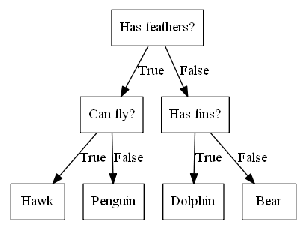

In [2]:
import mglearn
mglearn.plots.plot_animal_tree()

在上图中，树的每个结点代表一个问题或一个包含答案的终结点（也叫叶结点）。树的边将问题的答案与将问的下一个问题连接起来。用机器学习的语言来说就是，为了区分四类动物（鹰、企鹅、海豚和熊），我们利用三个特征（“有没有羽毛”“会不会飞”和“有没有鳍”）来构建一个模型。我们可以利用监督学习从数据中学习模型，而无需人为构建模型。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import seaborn as sns
sns.set(style = "white")

下面在乳腺癌数据集上更详细地观察预剪枝的效果。利用默认设置来构建模型，默认将树完全展开（树不断分支，直到所有叶结点都是纯的）。固定树的random_state，用于在内部解决平局问题。

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


上述训练集上的精度是100%，这是因为叶结点都是纯的，树的深度很大，足以完美地记住训练数据的所有标签。如果我们不限制决策树的深度，它的深度和复杂度都可以变得特别大。因此，未剪枝的树容易过拟合，对新数据的泛化性能不佳。

我们将预剪枝应用在决策树上，这可以在完美拟合训练数据之前阻止树的展开。一种选择是在到达一定深度后停止树的展开。这里我们设置max_depth=4，这意味着只可以连续问4个问题。限制树的深度可以减少过拟合。这会降低训练集的精度，但可以提高测试集的精度。

In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [6]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", 
                class_names=["malignant","benign"],
                feature_names=cancer.feature_names, 
                impurity=False, filled=True)

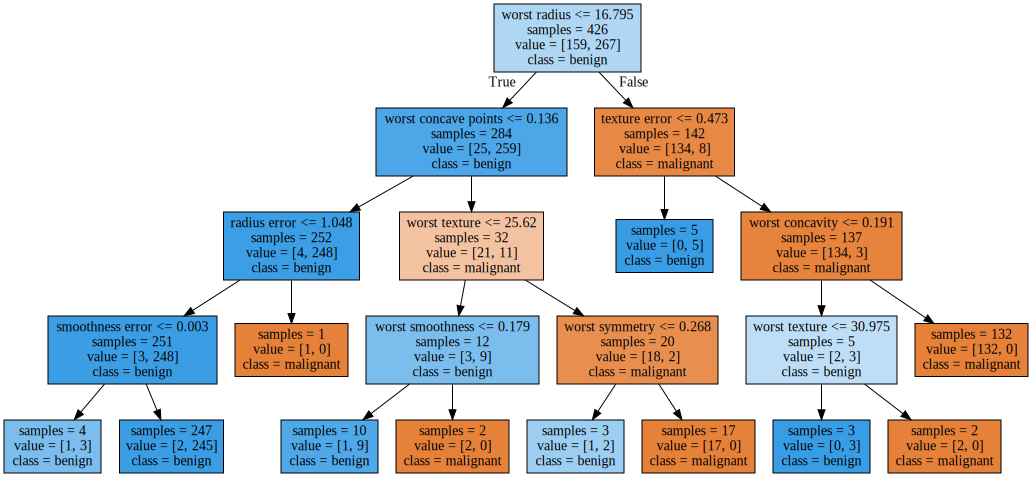

In [7]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

树的可视化有助于深入理解算法是如何进行预测的，也是易于向非专家解释的机器学习算法的优秀示例。

不过，即使这里树的深度只有4层，也有点太大了。深度更大的树（深度为10并不罕见）更加难以理解。一种观察树的方法可能有用，就是找出大部分数据的实际路径。

上图中每个结点的samples给出了该结点中的样本个数，values给出的是每个类别的样本个数。

观察worst radius<=16.795分支右侧的子结点，我们发现它只包含8个良性样本，但有134个恶性样本。树的这一侧的其余分支只是利用一些更精细的区别将这8个良性样本分离出来。在第一次划分右侧的142个样本中，几乎所有样本（132个）最后都进入最右侧的叶结点中。再来看一下根结点的左侧子结点，对于worst radius>16.795，我们得到25个恶性样本和259个良性样本。几乎所有良性样本最终都进入左数第二个叶结点中，大部分其他叶结点都只包含很少的样本。

In [8]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

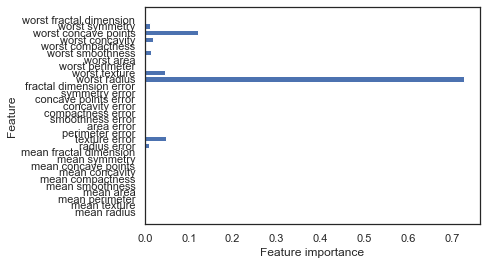

In [10]:
plot_feature_importances_cancer(tree)

上图为在乳腺癌数据集上学到的决策树特征重要性的可视化。如图可见，顶部划分用到的特征最大半径(worst radius)是最重要的特征。

第一层划分已经将两个类别区分得很好，这也证实了我们在分析树时的观察结论。但是，如果某个特征的feature_importance_很小，并不能说明这个特征没有提供任何信息。这只能说明该特征没有被树选中，可能是因为另一个特征也包含了同样的信息。

与线性模型的系数不同，特征重要性始终为正数，也不能说明该特征对应哪个类别。特征重要性告诉我们“worst radius”（最大半径）特征很重要，但并没有告诉我们半径大表示样本是良性还是恶性。事实上，在特征和类别之间可能没有这样简单的关系。

Feature importances: [0. 1.]


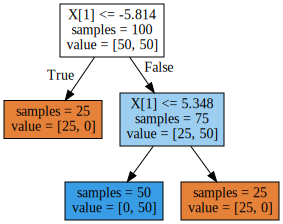

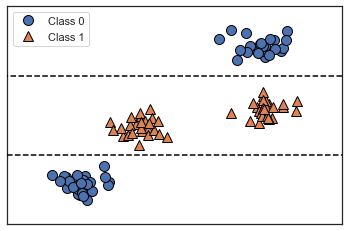

In [11]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

上图显示的是有两个特征和两个类别的数据集。这里所有信息都包含在X[1]中，没有用到X[0]。但X[1]和输出类别之间并不是单调关系，即我们不能这么说：“较大的X[1]对应类别0，较小的X[1]对应类别1”（反之亦然）。

虽然我们主要讨论的是用于分类的决策树，但对用于回归的决策树来说，所有内容都是类似的，在DecisionTreeRegressor中实现。回归树的用法和分析与分类树非常类似。

##### 注意！！！在将基于树的模型用于回归时，它的一个重要特殊性质为，DecisionTreeRegressor（以及其他所有基于树的回归模型）不能外推（extrapolate），也不能在训练数据范围之外进行预测。

Text(0, 0.5, 'Price in $/Mbyte')

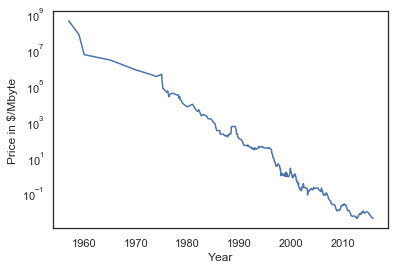

In [16]:
# 示例：
# 计算机内存（RAM）历史价格的数据集
ram_prices = pd.read_csv("../data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

上图为用对数坐标绘制RAM价格的历史发展。在用对数坐标绘图时，二者的线性关系看起来非常好，所以预测应该相对比较容易，除了一些不平滑之处之外。

我们将利用2000年前的历史数据来预测2000年后的价格，只用日期作为特征。我们将对比两个简单的模型：DecisionTreeRegressor和LinearRegression。我们对价格取对数，使得二者关系的线性相对更好。这对DecisionTreeRegressor不会产生什么影响，但对LinearRegression的影响却很大。训练模型并做出预测之后，我们应用指数映射来做对数变换的逆运算。为了便于可视化，我们这里对整个数据集进行预测，但如果是为了定量评估，我们将只考虑测试数据集。

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 利用历史数据预测2000年后的价格
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# 基于日期来预测价格
X_train = data_train.date[:, np.newaxis]
# 我们利用对数变换得到数据和目标之间更简单的关系
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# 对所有数据进行预测
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# 对数变换逆运算
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

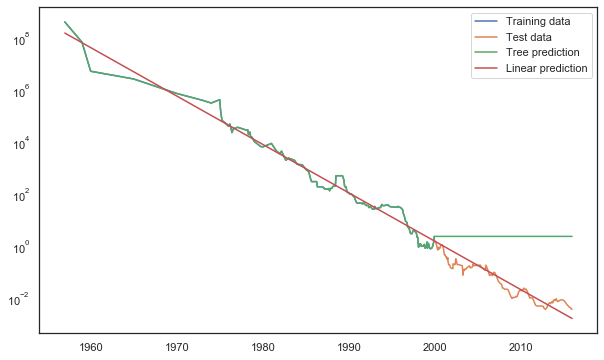

In [18]:
plt.figure(figsize = (10, 6))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

两个模型之间的差异非常明显。线性模型用一条直线对数据做近似，这是我们所知道的。这条线对测试数据（2000年后的价格）给出了相当好的预测，不过忽略了训练数据和测试数据中一些更细微的变化。与之相反，树模型完美预测了训练数据。由于我们没有限制树的复杂度，因此它记住了整个数据集。但是，一旦输入超出了模型训练数据的范围，模型就只能持续预测最后一个已知数据点。
##### 树不能在训练数据的范围之外生成“新的”响应。所有基于树的模型都有这个缺点。